In [1]:
%matplotlib inline
from MachineLearning import *

In [2]:
class basic(DataExtractor):
    def getparameters(self):
        return ['BlightViolationNumber', 'Call311Number', 'crime']
    
    def getquery(self):
        return ("select BlightViolationNumber, Call311Number, Demolished, coalesce(count(CrimeTypeId),0) as crime from OnlyViolationDataSet"
                " left outer join crimeandlocal on crimeandlocal.StreetNumberCorrected = OnlyViolationDataSet.StreetNumber "
                " and crimeandlocal.StreetName = OnlyViolationDataSet.StreetName group by OnlyViolationDataSet.StreetName, OnlyViolationDataSet.StreetNumber order by random()")
     

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.5133950316609839
precision 0.5069147598692482
recall 0.9819775937652216
f1 0.6686567164179105
Roc 0.513395031660984
[[  92 1961]
 [  37 2016]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.7495652173913043
precision 0.8958513396715644
recall 0.5192885771543087
f1 0.6574690770694578
Roc 0.7336352231767659
[[4392  241]
 [1919 2073]]



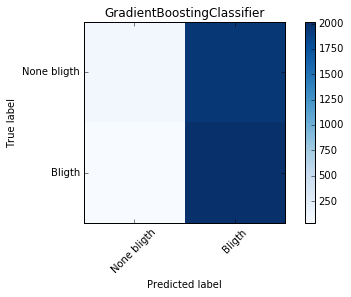

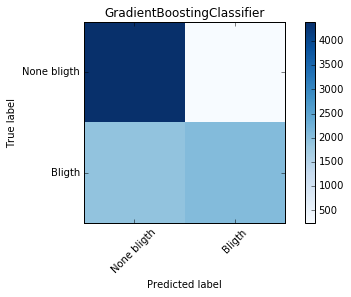

In [3]:
BenchMarkRandom(basic())

In [3]:
class basic2(DataExtractor):
    def getparameters(self):
        return ['BlightViolationNumber', 'Call311Number', 'crime']
    
    def getquery(self):
        return ("select BlightViolationNumber, Call311Number, Demolished, AmbientCrime8 -coalesce(count(CrimeTypeId),0) as crime from OnlyViolationDataSet"
                " left outer join crimeandlocal on crimeandlocal.StreetNumberCorrected = OnlyViolationDataSet.StreetNumber "
                " and crimeandlocal.StreetName = OnlyViolationDataSet.StreetName group by OnlyViolationDataSet.StreetName, OnlyViolationDataSet.StreetNumber order by random()")
     

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.5119337554797857
precision 0.5061542326048731
recall 0.9814905017048222
f1 0.6678820019887306
Roc 0.5119337554797857
[[  87 1966]
 [  38 2015]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.5367754505601559
precision 0.5213578500707213
recall 0.8977106673161227
f1 0.6596277738010021
Roc 0.5367754505601559
[[ 361 1692]
 [ 210 1843]]



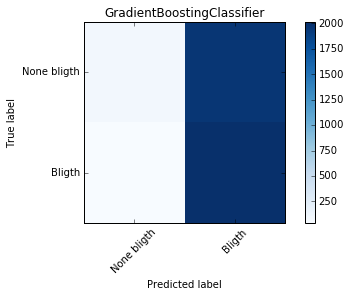

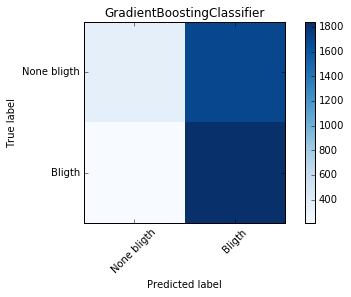

In [5]:
BenchMarkRandom(basic(), basic2())

In [4]:
class LastUltimateExctractor(DataExtractor):
    def getparameters(self):
        return ['bnumber', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'TRAFFICVIOLATIONS1G8','ASSAULTG8',
                'LARCENYG8','DAMAGETOPROPERTYG8','AGGRAVATEDASSAULTG8','BURGLARYG8', 'STOLENVEHICLEG8',
                'TRAFFICVIOLATIONS2G8','ROBBERYG8','DANGEROUSDRUGSG8', 'AmbientCall8', 'call7', 'call6', 
                'lastyear', 'last2year', 'last3year', 'more3years',
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation']
    
    def getquery(self):
        return ("select BlightViolationNumber - coalesce(UnpayedViolationByHouse.Count,0) as bnumber, Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty, lastyear, last2year, last3year, more3years, PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpayed  from NewdataZipViolation2 left outer join UnpayedViolationByHouse "
            "on  NewdataZipViolation2.StreetNumber=UnpayedViolationByHouse.StreetNumber and  NewdataZipViolation2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6544081831466148
precision 0.650952380952381
recall 0.665854846566001
f1 0.6583192872622201
Roc 0.6544081831466148
[[1320  733]
 [ 686 1367]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.5379931807111544
precision 0.5220214568040655
recall 0.9006332196785193
f1 0.6609472743521002
Roc 0.5379931807111544
[[ 360 1693]
 [ 204 1849]]



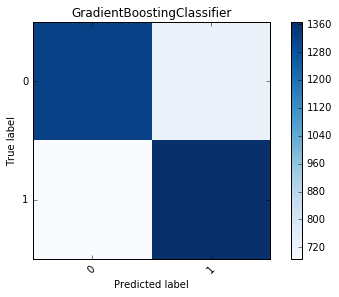

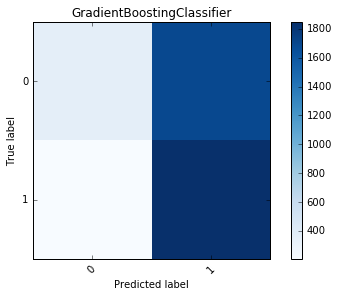

In [23]:
BenchMarkRandom(LastUltimateExctractor(), basic2())

In [5]:
class UltraWithDrugGeo5CrimeSimplifiedAndCallRates(DataExtractor):
    def getparameters(self):
        return [ 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'ALLASSAULTG8','CallRating2', 'CallRating3','CallRating5',
                'LARCENYG8', 'DANGEROUSDRUGSG8', 'CallRating4',
                'AmbientCall8', 'call7', 'call6', 'lastyear', 'last2year', 'last3year', 'more3years',
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageRenters', 'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation', 'drugcrimegeo5']
    
    def getquery(self):
        return ("select coalesce(drugcrimeNumber,0) as drugcrimegeo5, coalesce(CallRating2,0)  as CallRating2, "
                 "coalesce(CallRating3,0)  as CallRating3, coalesce(CallRating5,0)  as CallRating5, coalesce(CallRating4,0)  as CallRating4,"
                "BlightViolationNumber - coalesce(UnpayedViolationByHouse.Count,0) as bnumber, "
                "Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished , " 
             "TRAFFICVIOLATIONS1G8,ASSAULTG8 + AGGRAVATEDASSAULTG8 as ALLASSAULTG8,LARCENYG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8, "
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty, lastyear, last2year, last3year, more3years, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, coalesce(UnpayedViolationByHouse.Count,0) as Unpayed "
            "  from NewdataZipViolation2 left outer join drugcrimegeo5 on NewdataZipViolation2.Geo5 = drugcrimegeo5.GeoHash "
            " left outer join callbyrating  on  NewdataZipViolation2.StreetNumber=callbyrating.StreetNumberCorrected and  NewdataZipViolation2.StreetName =callbyrating.StreetName "
            " left outer join UnpayedViolationByHouse  on  NewdataZipViolation2.StreetNumber=UnpayedViolationByHouse.StreetNumber "
            "and  NewdataZipViolation2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6536775450560156
precision 0.6513189448441247
recall 0.6614710180224063
f1 0.6563557274045433
Roc 0.6536775450560156
[[1326  727]
 [ 695 1358]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6544081831466148
precision 0.655850540806293
recall 0.6497808085728203
f1 0.652801565940788
Roc 0.6544081831466148
[[1353  700]
 [ 719 1334]]



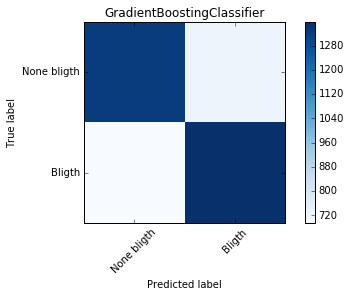

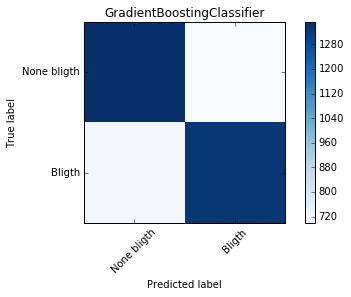

In [8]:
BenchMarkRandom(LastUltimateExctractor(), UltraWithDrugGeo5CrimeSimplifiedAndCallRates())

In [5]:
class UltraWithDrugGeo5CrimeSimplified(DataExtractor):
    def getparameters(self):
        return ['Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'ALLASSAULTG8',
                'LARCENYG8', 'STOLENVEHICLEG8', 'ROBBERYG8', 'DANGEROUSDRUGSG8',
                'AmbientCall8', 'call7', 'call6', 'lastyear', 'last2year', 'last3year', 'more3years',
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageRenters', 'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation', 'drugcrimegeo5']
    
    def getquery(self):
        return ("select coalesce(drugcrimeNumber,0) as drugcrimegeo5, BlightViolationNumber - coalesce(UnpayedViolationByHouse.Count,0) as bnumber, "
                "Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished , " 
             "TRAFFICVIOLATIONS1G8,ASSAULTG8 + AGGRAVATEDASSAULTG8 as ALLASSAULTG8,LARCENYG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty, lastyear, last2year, last3year, more3years, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, coalesce(UnpayedViolationByHouse.Count,0) as Unpayed"
            "  from NewdataZipViolation2 left outer join drugcrimegeo5 on NewdataZipViolation2.Geo5 = drugcrimegeo5.GeoHash left outer join UnpayedViolationByHouse "
            "on  NewdataZipViolation2.StreetNumber=UnpayedViolationByHouse.StreetNumber and  NewdataZipViolation2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6570871894788115
precision 0.6581657675331045
recall 0.6536775450560156
f1 0.6559139784946237
Roc 0.6570871894788114
[[1356  697]
 [ 711 1342]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6563565513882124
precision 0.6571988246816847
recall 0.6536775450560156
f1 0.6554334554334554
Roc 0.6563565513882124
[[1353  700]
 [ 711 1342]]



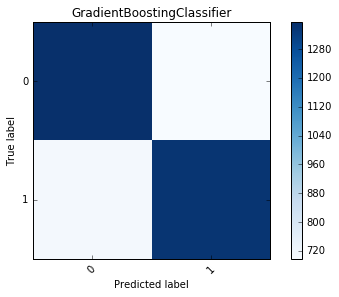

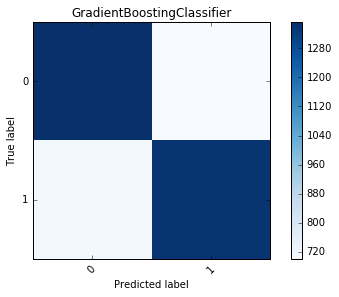

In [31]:
BenchMarkRandom(UltraWithDrugGeo5CrimeSimplified(), UltraWithDrugGeo5CrimeSimplifiedAndCallRates())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data 

precision GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6558694593278129
precision 0.6554907677356657
recall 0.6570871894788115
f1 0.6562880077839942
Roc 0.6558694593278129
[[1344  709]
 [ 704 1349]]

recall GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6507549926936191
precision 0.6510492923377257
recall 0.6497808085728203
f1 0.6504144319843977
Roc 0.6507549926936191
[[1338  715]
 [ 719 1334]]

f1 GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6553823672674135
precision 0.6585487077534792
recall 0.6453969800292255
f1 0.6519065190651907
Roc 0.6553823672674135
[[1366  687]
 [ 728 1325]]

roc GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6519727228446176
precision 0.6518987341772152
recall 0.6522162688748173
f1 0.6520574628682737
Roc 0.6519727228446177
[[1338  715]
 [ 714 1339]]



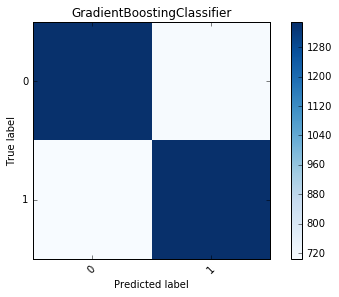

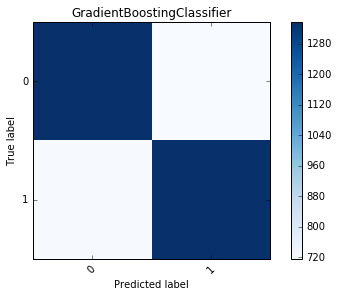

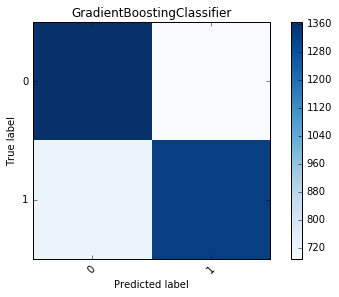

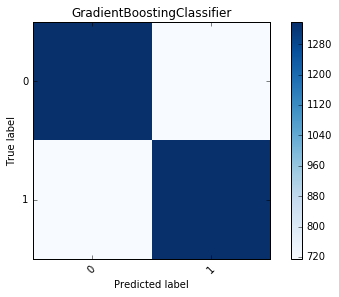

In [33]:
from sklearn.tree import DecisionTreeClassifier as DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

extract = UltraWithDrugGeo5CrimeSimplified()
classification = [DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), LogisticRegression(), KNeighborsClassifier(), SGDClassifier() ]
BenchMarks(classification, lambda : extract.getdata())

In [34]:
getparametersBoost(UltraWithDrugGeo5CrimeSimplified())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


[(0.0, 'PersonsPerHousehold'),
 (0.00070326505270730836, 'ALLASSAULTG8'),
 (0.00079557622078041293, 'DANGEROUSDRUGSG8'),
 (0.0020715385188993514, 'STOLENVEHICLEG8'),
 (0.0074279595852679743, 'LARCENYG8'),
 (0.0075378651659703984, 'ROBBERYG8'),
 (0.0078507089521431869, 'PercentageFamilyHouseholds'),
 (0.010015893788853994, 'AmbientCall8'),
 (0.011922195001611709, 'MedianAge'),
 (0.015852478000015258, 'PercentageBelowPoverty'),
 (0.016956065883687872, 'call7'),
 (0.019713744502994176, 'AmbientCrime8'),
 (0.023266567940964121, 'PercentagePopulation'),
 (0.026281208304230756, 'last2year'),
 (0.028798685433294224, 'lastyear'),
 (0.029622774744523805, 'more3years'),
 (0.030156248238987753, 'PercentageRenters'),
 (0.037538671957356079, 'Call311Number'),
 (0.037755593871389798, 'PercentageWhitePopulation'),
 (0.038065449374680413, 'last3year'),
 (0.039605613840257986, 'call6'),
 (0.040459444143045815, 'MedianHouseValue'),
 (0.043933109941940503, 'IncomePerHousehold'),
 (0.060849505191316731, '

In [6]:
class ClassicExtractor(DataExtractor):
    def __init__(self, norm='l2'):
        DataExtractor.__init__(self, norm)
        self.norm = norm
     
    def getparameters(self):
        return ['BlightViolationNumber', 'Call311Number', 'AmbientCrime8', 'crime7', 
        'crime6', 'AmbientCall8', 'call7', 'call6', 'AmbientViolation8', 'v7', 'v6']
    
    def getquery(self):
        return ("SELECT BlightViolationNumber, Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7,"
        "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, "
        " AmbientCall7- AmbientCall8 as call7, AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, "
        " AmbientViolation6 - AmbientViolation7 as v6, Demolished from OnlyViolationDataSet order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6514856307842182
precision 0.6547263681592039
recall 0.6410131514856308
f1 0.6477971941914841
Roc 0.6514856307842182
[[1359  694]
 [ 737 1316]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6690209449585972
precision 0.5706806282722513
recall 0.1542816702052371
f1 0.24289693593314762
Roc 0.5466915220688272
[[2529  164]
 [1195  218]]



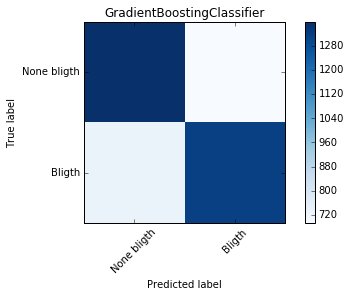

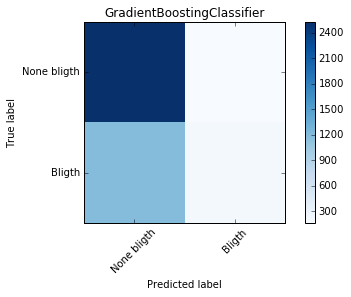

In [14]:
BenchMarkRandom(UltraWithDrugGeo5CrimeSimplified(), ClassicExtractor())

In [37]:
getparametersBoost(ClassicExtractor())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


[(0.025510021984713256, 'Call311Number'),
 (0.029488987835362229, 'AmbientCall8'),
 (0.044839493315794572, 'call7'),
 (0.048464474955378353, 'AmbientCrime8'),
 (0.076157283603296946, 'crime6'),
 (0.077845771416720652, 'v6'),
 (0.10491886369961773, 'crime7'),
 (0.12058706186600848, 'v7'),
 (0.13765001135484936, 'call6'),
 (0.14863948966079557, 'AmbientViolation8'),
 (0.18589854030746283, 'BlightViolationNumber')]

In [48]:
class UltraWithDrugGeo5Crime(DataExtractor):
    def getparameters(self):
        return ['Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'TRAFFICVIOLATIONS1G8','ASSAULTG8',
                'LARCENYG8','DAMAGETOPROPERTYG8','AGGRAVATEDASSAULTG8','BURGLARYG8', 'STOLENVEHICLEG8',
                'TRAFFICVIOLATIONS2G8','ROBBERYG8','DANGEROUSDRUGSG8', 'AmbientCall8', 'call7', 'call6', 
                'lastyear', 'last2year', 'last3year', 'more3years',
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation', 'drugcrimegeo5']
    
    def getquery(self):
        return ("select coalesce(drugcrimeNumber,0) as drugcrimegeo5, BlightViolationNumber - coalesce(UnpayedViolationByHouse.Count,0) as bnumber, Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished , " 
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty, lastyear, last2year, last3year, more3years, PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, coalesce(UnpayedViolationByHouse.Count,0) as Unpayed"
            "  from NewdataZipViolation2 left outer join drugcrimegeo5 on NewdataZipViolation2.Geo5 = drugcrimegeo5.GeoHash left outer join UnpayedViolationByHouse "
            "on  NewdataZipViolation2.StreetNumber=UnpayedViolationByHouse.StreetNumber and  NewdataZipViolation2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6561130053580126
precision 0.6568771414586393
recall 0.6536775450560156
f1 0.6552734375000001
Roc 0.6561130053580126
[[1352  701]
 [ 711 1342]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6512420847540185
precision 0.5177664974619289
recall 0.14107883817427386
f1 0.22173913043478263
Roc 0.5348251333728512
[[2470  190]
 [1242  204]]



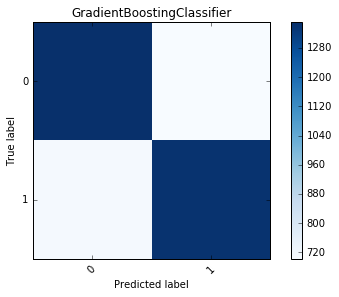

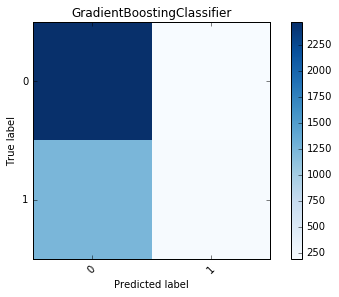

In [49]:
BenchMarkRandom(UltraWithDrugGeo5Crime(), ClassicExtractor())

In [50]:
getparametersBoost(UltraWithDrugGeo5Crime())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


[(0.0, 'AGGRAVATEDASSAULTG8'),
 (0.0, 'ASSAULTG8'),
 (0.0, 'DAMAGETOPROPERTYG8'),
 (0.0020407318697003114, 'STOLENVEHICLEG8'),
 (0.0020443486750027378, 'PersonsPerHousehold'),
 (0.0050307331319860739, 'PercentageBelowPoverty'),
 (0.006080555447441632, 'BURGLARYG8'),
 (0.0061980715616216679, 'DANGEROUSDRUGSG8'),
 (0.0071516364928268386, 'TRAFFICVIOLATIONS1G8'),
 (0.0075265172965059968, 'UnemployedPercentage'),
 (0.0075571889142453785, 'AmbientCall8'),
 (0.0079738752079172252, 'LARCENYG8'),
 (0.0083861574725225593, 'ROBBERYG8'),
 (0.0096133696066899831, 'PercentageBelow50Poverty'),
 (0.010939180424017288, 'call7'),
 (0.011779447916273549, 'TRAFFICVIOLATIONS2G8'),
 (0.011903381735777367, 'PercentageFamilyHouseholds'),
 (0.015134705662951289, 'AmbientCrime8'),
 (0.017611753715939947, 'PercentagePopulation'),
 (0.022597669475155388, 'last2year'),
 (0.023772859121595026, 'MedianAge'),
 (0.024638533007928794, 'PercentageRenters'),
 (0.027279284615118728, 'call6'),
 (0.033381230251998351, 'las

In [7]:
class ExtractorWithZipCodeAndPopulationAndAgeScale(DataExtractorScaler):
    def getparameters(self):
        return ['bnumber', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'TRAFFICVIOLATIONS1G8','ASSAULTG8',
                'LARCENYG8','DAMAGETOPROPERTYG8','AGGRAVATEDASSAULTG8','BURGLARYG8', 'STOLENVEHICLEG8',
                'TRAFFICVIOLATIONS2G8','ROBBERYG8','DANGEROUSDRUGSG8', 'AmbientCall8', 'call7', 'call6', 
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation']
    
    def getquery(self):
        return ("select BlightViolationNumber - coalesce(UnpayedViolationByHouse.Count,0) as bnumber, Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty,  PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpayed  from NewdataZip2 left outer join UnpayedViolationByHouse "
            "on  NewdataZip2.StreetNumber=UnpayedViolationByHouse.StreetNumber and  NewdataZip2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6400389673648319
precision 0.6355492692126355
recall 0.6566000974184121
f1 0.6459032103497845
Roc 0.640038967364832
[[1280  773]
 [ 705 1348]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.7478260869565218
precision 0.8927799394725465
recall 0.5172845691382766
f1 0.655035685963521
Roc 0.7318777691363734
[[4385  248]
 [1927 2065]]



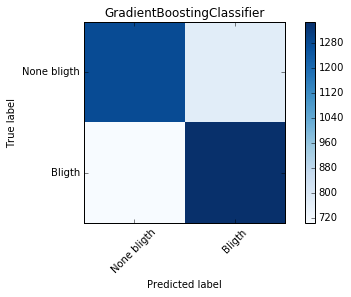

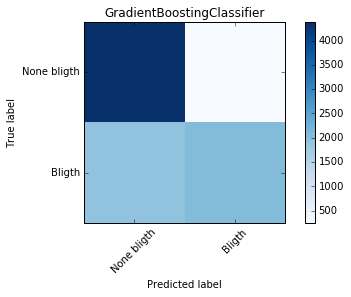

In [17]:
BenchMarkRandom(ExtractorWithZipCodeAndPopulationAndAgeScale())

In [18]:
getparametersBoost(ExtractorWithZipCodeAndPopulationAndAgeScale())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[(0.0, 'DAMAGETOPROPERTYG8'),
 (0.0002287335439626607, 'AGGRAVATEDASSAULTG8'),
 (0.0011476017782108612, 'LARCENYG8'),
 (0.0022194386061202718, 'ASSAULTG8'),
 (0.0026768624440329696, 'AmbientCall8'),
 (0.0031007772593954677, 'BURGLARYG8'),
 (0.0036970951349428595, 'TRAFFICVIOLATIONS2G8'),
 (0.0047371336840837594, 'DANGEROUSDRUGSG8'),
 (0.004943910147799652, 'STOLENVEHICLEG8'),
 (0.0073680061763085718, 'PercentageBelowPoverty'),
 (0.0084916399122163758, 'TRAFFICVIOLATIONS1G8'),
 (0.013583082386963258, 'PercentageBelow50Poverty'),
 (0.013745401660710612, 'UnemployedPercentage'),
 (0.014754353602020336, 'ROBBERYG8'),
 (0.016348492693361243, 'AmbientCrime8'),
 (0.017762657727898618, 'MedianHouseValue'),
 (0.018276981147690868, 'IncomePerHousehold'),
 (0.02001261259094627, 'call7'),
 (0.024686327138918412, 'PercentagePopulation'),
 (0.025665840132506314, 'PercentageWhitePopulation'),
 (0.028088370960251619, 'bnumber'),
 (0.028458306918700483, 'Call311Number'),
 (0.028676480667114444, 'Percen

In [3]:
class Demographic(DataExtractorScaler):
    def getparameters(self):
        return ['BlightViolationNumber', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 
                'AmbientCall8', 'call7', 'call6', 
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation']
    
    def getquery(self):
        return ("select BlightViolationNumber, Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty,  PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpayed  from NewdataZip2 left outer join UnpayedViolationByHouse "
            "on  NewdataZip2.StreetNumber=UnpayedViolationByHouse.StreetNumber and  NewdataZip2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.638334145153434
precision 0.6342155009451795
recall 0.6536775450560156
f1 0.6437994722955145
Roc 0.638334145153434
[[1279  774]
 [ 711 1342]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6419873356064296
precision 0.6370474847202633
recall 0.660009741841208
f1 0.6483253588516746
Roc 0.6419873356064296
[[1281  772]
 [ 698 1355]]



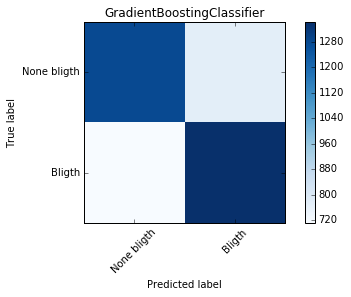

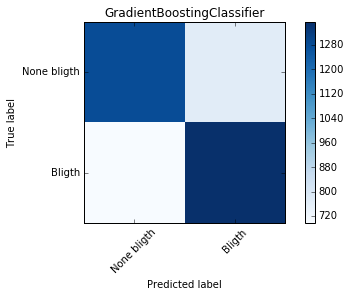

In [21]:
BenchMarkRandom(ExtractorWithZipCodeAndPopulationAndAgeScale(), Demographic())

In [6]:
class ExtractorWithZipCodeAndPopulationAndAgeScaleAndPastBligth(DataExtractorScaler):
    def getparameters(self):
        return ['pastbligth6', 'pastbligth5', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'TRAFFICVIOLATIONS1G8','ASSAULTG8',
                'LARCENYG8','DAMAGETOPROPERTYG8','AGGRAVATEDASSAULTG8','BURGLARYG8', 'STOLENVEHICLEG8',
                'TRAFFICVIOLATIONS2G8','ROBBERYG8','DANGEROUSDRUGSG8', 'AmbientCall8', 'call7', 'call6', 
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation']
    
    def getquery(self):
        return ("select Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
                "(select  count(*) from bligthdata where  bligthdata.Geo6 = NewdataZip2.Geo6 and "
                "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth6, "
                  "(select  count(*) from bligthdata where  bligthdata.Geo5 = NewdataZip2.Geo5 and "
                 "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth5, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty,  PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpayed  from NewdataZip2 left outer join UnpayedViolationByHouse "
            "on  NewdataZip2.StreetNumber=UnpayedViolationByHouse.StreetNumber and  NewdataZip2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.6371164150024354
precision 0.6329711856400567
recall 0.6527033609352167
f1 0.6426858513189448
Roc 0.6371164150024354
[[1276  777]
 [ 713 1340]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8490014612761811
precision 0.9014005602240897
recall 0.7837311251826595
f1 0.8384575299635226
Roc 0.8490014612761811
[[1877  176]
 [ 444 1609]]



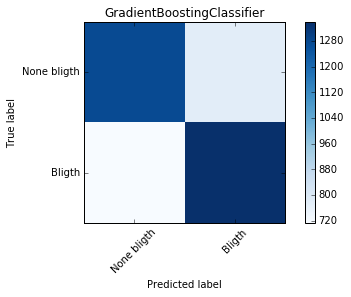

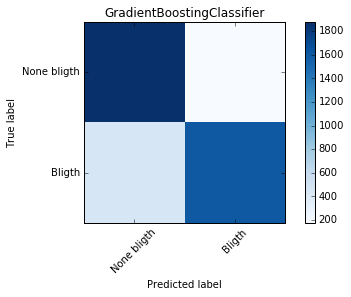

In [31]:
BenchMarkRandom(ExtractorWithZipCodeAndPopulationAndAgeScale(), ExtractorWithZipCodeAndPopulationAndAgeScaleAndPastBligth())

In [32]:
getparametersBoost(ExtractorWithZipCodeAndPopulationAndAgeScaleAndPastBligth())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[(0.0, 'AGGRAVATEDASSAULTG8'),
 (0.0, 'DAMAGETOPROPERTYG8'),
 (0.0, 'LARCENYG8'),
 (0.0, 'STOLENVEHICLEG8'),
 (0.0, 'TRAFFICVIOLATIONS2G8'),
 (9.0367290817302095e-05, 'AmbientCall8'),
 (0.00091241371326728946, 'TRAFFICVIOLATIONS1G8'),
 (0.0011529623836336134, 'ASSAULTG8'),
 (0.001544504803712898, 'DANGEROUSDRUGSG8'),
 (0.0017064768951376916, 'ROBBERYG8'),
 (0.0020584460489274539, 'call7'),
 (0.0020737575372107493, 'BURGLARYG8'),
 (0.0028188242135895564, 'UnemployedPercentage'),
 (0.0066605109055449833, 'PercentageBelowPoverty'),
 (0.0085038407172146873, 'call6'),
 (0.011691740734562113, 'v7'),
 (0.01194667446822348, 'IncomePerHousehold'),
 (0.012285608567855584, 'AmbientCrime8'),
 (0.012384975896561047, 'PersonsPerHousehold'),
 (0.014862992423168712, 'PercentagePopulation'),
 (0.017813633819355256, 'pastbligth6'),
 (0.019619927756577924, 'MedianHouseValue'),
 (0.021434105317081679, 'crime7'),
 (0.02199391204492197, 'PercentageWhitePopulation'),
 (0.022433097718661157, 'PercentageRenter

In [8]:
class Ultimate(DataExtractorScaler):
    def getparameters(self):
        return ['pastbligth6', 'pastbligth5', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'TRAFFICVIOLATIONS1G8','ASSAULTG8',
                'LARCENYG8','DAMAGETOPROPERTYG8','AGGRAVATEDASSAULTG8','BURGLARYG8', 'STOLENVEHICLEG8', 'crime5',
                'TRAFFICVIOLATIONS2G8','ROBBERYG8','DANGEROUSDRUGSG8', 'AmbientCall8', 'call7', 'call6', 
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation']
    
    def getquery(self):
        return ("select Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
                "coalesce(crimeNumber,0) as crime5,"
                "(select  count(*) from bligthdata where  bligthdata.Geo6 = NewdataZip2.Geo6 and "
                "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth6, "
                  "(select  count(*) from bligthdata where  bligthdata.Geo5 = NewdataZip2.Geo5 and "
                 "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth5, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty,  PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpayed  from NewdataZip2  "
            "left outer join crimegeo5 on  NewdataZip2.Geo5=crimegeo5.GeoHash "
            "left outer join UnpayedViolationByHouse on  NewdataZip2.StreetNumber=UnpayedViolationByHouse.StreetNumber "
            " and  NewdataZip2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8818801753531418
precision 0.9394618834080718
recall 0.8163662932294203
f1 0.8735991660151159
Roc 0.8818801753531417
[[1945  108]
 [ 377 1676]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8560642961519728
precision 0.907469342251951
recall 0.7929858743302484
f1 0.8463737977644918
Roc 0.8560642961519728
[[1887  166]
 [ 425 1628]]



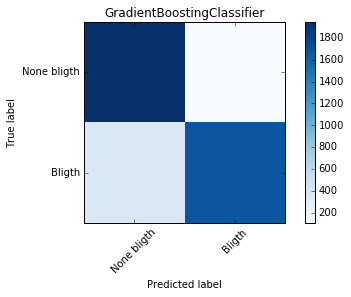

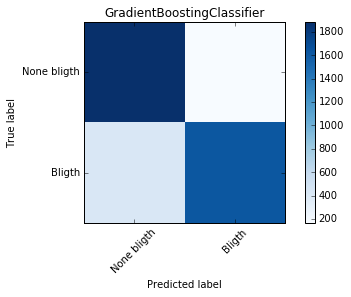

In [9]:
BenchMarkRandom(Ultimate(), ExtractorWithZipCodeAndPopulationAndAgeScaleAndPastBligth())

In [10]:
getparametersBoost(Ultimate())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[(0.0, 'AGGRAVATEDASSAULTG8'),
 (0.0, 'AmbientCall8'),
 (0.0, 'DAMAGETOPROPERTYG8'),
 (0.0, 'DANGEROUSDRUGSG8'),
 (0.0, 'LARCENYG8'),
 (0.0, 'ROBBERYG8'),
 (0.0, 'STOLENVEHICLEG8'),
 (0.0, 'TRAFFICVIOLATIONS1G8'),
 (0.0, 'TRAFFICVIOLATIONS2G8'),
 (0.0, 'call7'),
 (0.0011301343214270311, 'BURGLARYG8'),
 (0.0011444077419183851, 'ASSAULTG8'),
 (0.001518046328932569, 'UnemployedPercentage'),
 (0.0040534914314380773, 'PercentageWhitePopulation'),
 (0.0048104531984664708, 'PercentageBelowPoverty'),
 (0.0054580738820688458, 'v7'),
 (0.0067635202953770859, 'call6'),
 (0.0098800188985627042, 'PercentagePopulation'),
 (0.010650001859404797, 'PercentageFamilyHouseholds'),
 (0.011343121635863911, 'v6'),
 (0.01242997947825265, 'AmbientCrime8'),
 (0.012502956070660003, 'MedianAge'),
 (0.012800667702024393, 'PercentageRenters'),
 (0.013807787400478855, 'MedianHouseValue'),
 (0.015087728239922533, 'IncomePerHousehold'),
 (0.01509169587343182, 'crime7'),
 (0.015881806921157579, 'pastbligth6'),
 (0.0159

In [16]:
class Ultimator(DataExtractorScaler):
    def getparameters(self):
        return ['pastbligth6', 'pastbligth5', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'TRAFFICVIOLATIONS1G8','ASSAULTG8',
                'LARCENYG8','DAMAGETOPROPERTYG8','AGGRAVATEDASSAULTG8','BURGLARYG8', 'STOLENVEHICLEG8', 'crime5', 'viol5',
                'TRAFFICVIOLATIONS2G8','ROBBERYG8','DANGEROUSDRUGSG8', 'AmbientCall8', 'call7', 'call6', 
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation']
    
    def getquery(self):
        return ("select Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
                "coalesce(crimeNumber,0) as crime5, "
                "coalesce(violationNumber,0) as viol5, "
                "(select  count(*) from bligthdata where  bligthdata.Geo6 = NewdataZip2.Geo6 and "
                "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth6, "
                  "(select  count(*) from bligthdata where  bligthdata.Geo5 = NewdataZip2.Geo5 and "
                 "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth5, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty,  PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpayed  from NewdataZip2  "
            "left outer join crimegeo5 on  NewdataZip2.Geo5=crimegeo5.GeoHash "
            "left outer join violationgeo5 on  NewdataZip2.Geo5=violationgeo5.GeoHash "
            "left outer join UnpayedViolationByHouse on  NewdataZip2.StreetNumber=UnpayedViolationByHouse.StreetNumber "
            " and  NewdataZip2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8818801753531418
precision 0.9424379232505643
recall 0.8134437408670239
f1 0.873202614379085
Roc 0.8818801753531418
[[1951  102]
 [ 383 1670]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8872381880175353
precision 0.9471316085489314
recall 0.8202630297126157
f1 0.8791438266771078
Roc 0.8872381880175353
[[1959   94]
 [ 369 1684]]



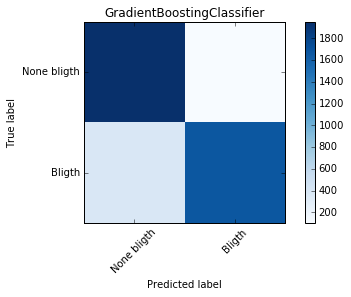

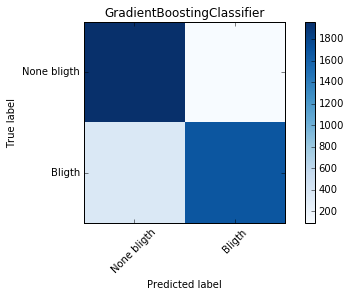

In [17]:
BenchMarkRandom(Ultimate(), Ultimator())

In [18]:
getparametersBoost(Ultimator())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[(0.0, 'AGGRAVATEDASSAULTG8'),
 (0.0, 'DAMAGETOPROPERTYG8'),
 (0.0, 'DANGEROUSDRUGSG8'),
 (0.0, 'LARCENYG8'),
 (0.0, 'STOLENVEHICLEG8'),
 (0.0, 'TRAFFICVIOLATIONS1G8'),
 (0.0, 'TRAFFICVIOLATIONS2G8'),
 (0.00071286266430294369, 'AmbientCall8'),
 (0.0012181919973951211, 'UnemployedPercentage'),
 (0.0013523241489495203, 'call7'),
 (0.0013871158709307097, 'BURGLARYG8'),
 (0.0015909037356278883, 'ASSAULTG8'),
 (0.0021198832771605076, 'PercentageBelowPoverty'),
 (0.0024199034393454872, 'PercentagePopulation'),
 (0.0028938079161563547, 'call6'),
 (0.0029919481783912639, 'ROBBERYG8'),
 (0.0033551852403010513, 'v7'),
 (0.0039144734818339832, 'PercentageWhitePopulation'),
 (0.006847300615480458, 'PercentageFamilyHouseholds'),
 (0.0091628604381252202, 'AmbientCrime8'),
 (0.0092818260102937675, 'MedianHouseValue'),
 (0.0096813055346567853, 'v6'),
 (0.010416818824543586, 'PercentageBelow50Poverty'),
 (0.011569391806609477, 'IncomePerHousehold'),
 (0.014455260940757079, 'PercentageRenters'),
 (0.015

In [19]:
class UltimatorSimplified(DataExtractorScaler):
    def getparameters(self):
        return ['pastbligth6', 'pastbligth5', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6','ASSAULTG8',
                'BURGLARYG8', 'crime5', 'viol5', 'ROBBERYG8', 'AmbientCall8', 'call7', 'call6', 
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation']
    
    def getquery(self):
        return ("select Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
                "coalesce(crimeNumber,0) as crime5, "
                "coalesce(violationNumber,0) as viol5, "
                "(select  count(*) from bligthdata where  bligthdata.Geo6 = NewdataZip2.Geo6 and "
                "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth6, "
                  "(select  count(*) from bligthdata where  bligthdata.Geo5 = NewdataZip2.Geo5 and "
                 "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth5, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "ASSAULTG8,BURGLARYG8,ROBBERYG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold,"
             " (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty,  PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpayed  from NewdataZip2  "
            "left outer join crimegeo5 on  NewdataZip2.Geo5=crimegeo5.GeoHash "
            "left outer join violationgeo5 on  NewdataZip2.Geo5=violationgeo5.GeoHash "
            "left outer join UnpayedViolationByHouse on  NewdataZip2.StreetNumber=UnpayedViolationByHouse.StreetNumber "
            " and  NewdataZip2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8838285435947394
precision 0.9497716894977168
recall 0.8105211885046274
f1 0.8746386333771352
Roc 0.8838285435947395
[[1965   88]
 [ 389 1664]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.889186556259133
precision 0.9519230769230769
recall 0.8197759376522162
f1 0.880921224810259
Roc 0.8891865562591329
[[1968   85]
 [ 370 1683]]



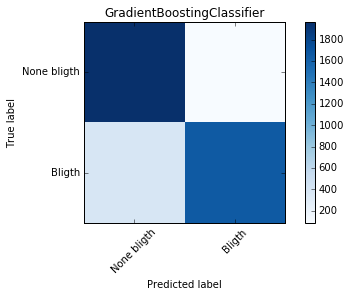

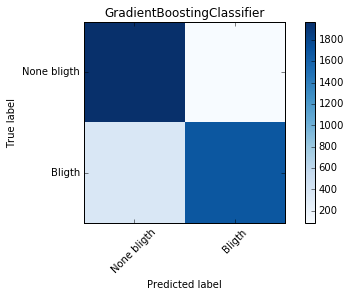

In [22]:
BenchMarkRandom(UltimatorSimplified(), Ultimator())

In [24]:
class UltimateComplete(DataExtractorScaler):
    def getparameters(self):
        return ['pastbligth6', 'pastbligth5', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'TRAFFICVIOLATIONS1G8','ASSAULTG8',
                'LARCENYG8','DAMAGETOPROPERTYG8','AGGRAVATEDASSAULTG8','BURGLARYG8', 'STOLENVEHICLEG8', 'crime5', 'viol5',
                'TRAFFICVIOLATIONS2G8','ROBBERYG8','DANGEROUSDRUGSG8', 'AmbientCall8', 'call7', 'call6', 'call5', 
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation']
    
    def getquery(self):
        return ("select Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
                "coalesce(crimeNumber,0) as crime5, "
                "coalesce(violationNumber,0) as viol5, "
                  "coalesce(callNumber,0) as call5, "
                "(select  count(*) from bligthdata where  bligthdata.Geo6 = NewdataZip2.Geo6 and "
                "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth6, "
                  "(select  count(*) from bligthdata where  bligthdata.Geo5 = NewdataZip2.Geo5 and "
                 "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth5, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty,  PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpayed  from NewdataZip2  "
            "left outer join crimegeo5 on  NewdataZip2.Geo5=crimegeo5.GeoHash "
            "left outer join callgeo5 on  NewdataZip2.Geo5=callgeo5.GeoHash "
            "left outer join violationgeo5 on  NewdataZip2.Geo5=violationgeo5.GeoHash "
            "left outer join UnpayedViolationByHouse on  NewdataZip2.StreetNumber=UnpayedViolationByHouse.StreetNumber "
            " and  NewdataZip2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8886994641987336
precision 0.9473094170403588
recall 0.8231855820750121
f1 0.8808965337503258
Roc 0.8886994641987336
[[1959   94]
 [ 363 1690]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8828543594739405
precision 0.9405829596412556
recall 0.8173404773502192
f1 0.8746416471201459
Roc 0.8828543594739406
[[1947  106]
 [ 375 1678]]



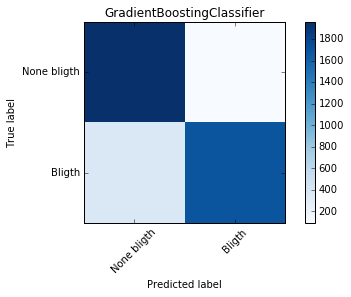

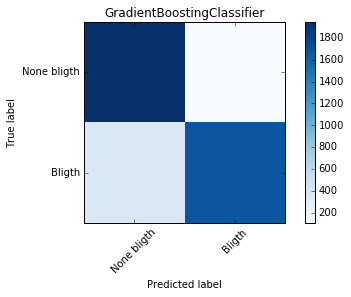

In [25]:
BenchMarkRandom(UltimateComplete(), Ultimator())

In [26]:
getparametersBoost(UltimateComplete())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[(0.0, 'AGGRAVATEDASSAULTG8'),
 (0.0, 'AmbientCall8'),
 (0.0, 'DAMAGETOPROPERTYG8'),
 (0.0, 'LARCENYG8'),
 (0.0, 'PercentageBelowPoverty'),
 (0.0, 'ROBBERYG8'),
 (0.0, 'STOLENVEHICLEG8'),
 (0.0, 'TRAFFICVIOLATIONS1G8'),
 (0.0, 'TRAFFICVIOLATIONS2G8'),
 (0.00041446842556305916, 'UnemployedPercentage'),
 (0.00067578973289932401, 'BURGLARYG8'),
 (0.0012407104128448546, 'DANGEROUSDRUGSG8'),
 (0.0014488729962199845, 'ASSAULTG8'),
 (0.0033226362098204721, 'call7'),
 (0.0036136614125794279, 'PercentageWhitePopulation'),
 (0.0046918886154282491, 'PercentageFamilyHouseholds'),
 (0.0056056528406277931, 'call6'),
 (0.0073265997315415986, 'v7'),
 (0.0078931717571853102, 'MedianHouseValue'),
 (0.0098286822513857994, 'PercentagePopulation'),
 (0.010902307982149417, 'v6'),
 (0.011029837302652935, 'AmbientCrime8'),
 (0.01344159839884018, 'PercentageBelow50Poverty'),
 (0.014886300368134391, 'MedianAge'),
 (0.014899719135254763, 'PersonsPerHousehold'),
 (0.015105352706063203, 'IncomePerHousehold'),
 (0.

In [29]:
class UltimateCompleteWith21(DataExtractorScaler):
    def getparameters(self):
        return ['pastbligth6', 'pastbligth5', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'TRAFFICVIOLATIONS1G8','ASSAULTG8',
                'LARCENYG8','DAMAGETOPROPERTYG8','AGGRAVATEDASSAULTG8','BURGLARYG8', 'STOLENVEHICLEG8', 'crime5', 'viol5',
                'TRAFFICVIOLATIONS2G8','ROBBERYG8','DANGEROUSDRUGSG8', 'AmbientCall8', 'call7', 'call6', 'call5', 'viol21',
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpayed', 'PercentagePopulation']
    
    def getquery(self):
        return ("select Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
                "coalesce(crimeNumber,0) as crime5, "
                "coalesce(violationNumber,0) as viol5, "
                "coalesce(callNumber,0) as call5, "
                 "coalesce(count21,0) as viol21, "
                "(select  count(*) from bligthdata where  bligthdata.Geo6 = NewdataZip2.Geo6 and "
                "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth6, "
                  "(select  count(*) from bligthdata where  bligthdata.Geo5 = NewdataZip2.Geo5 and "
                 "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth5, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty,  PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpayed  from NewdataZip2  "
            "left outer join crimegeo5 on  NewdataZip2.Geo5=crimegeo5.GeoHash "
            "left outer join callgeo5 on  NewdataZip2.Geo5=callgeo5.GeoHash "
            "left outer join violationgeo5 on  NewdataZip2.Geo5=violationgeo5.GeoHash "
            "left outer join viol21 on  NewdataZip2.StreetNumber=viol21.StreetNumberCorrected "
            " and  NewdataZip2.StreetName =viol21.StreetName "
            "left outer join UnpayedViolationByHouse on  NewdataZip2.StreetNumber=UnpayedViolationByHouse.StreetNumber "
            " and  NewdataZip2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.88334145153434
precision 0.9471590909090909
recall 0.8119824646858256
f1 0.8743771308680829
Roc 0.88334145153434
[[1960   93]
 [ 386 1667]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8918655625913298
precision 0.9476905954368392
recall 0.8295177788602046
f1 0.8846753246753246
Roc 0.8918655625913298
[[1959   94]
 [ 350 1703]]



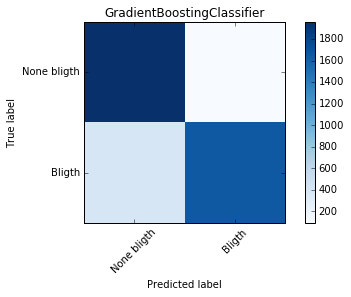

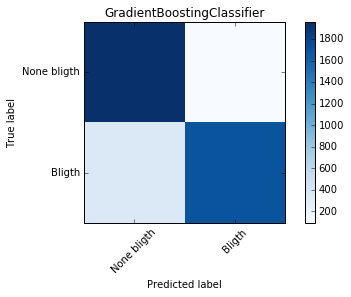

In [31]:
BenchMarkRandom(UltimateCompleteWith21(), UltimateComplete())

In [32]:
getparametersBoost(UltimateCompleteWith21())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[(0.0, 'AGGRAVATEDASSAULTG8'),
 (0.0, 'AmbientCall8'),
 (0.0, 'DAMAGETOPROPERTYG8'),
 (0.0, 'DANGEROUSDRUGSG8'),
 (0.0, 'LARCENYG8'),
 (0.0, 'ROBBERYG8'),
 (0.0, 'STOLENVEHICLEG8'),
 (0.0, 'TRAFFICVIOLATIONS1G8'),
 (0.0, 'TRAFFICVIOLATIONS2G8'),
 (1.6223971432732107e-05, 'UnemployedPercentage'),
 (0.0008889463331782163, 'BURGLARYG8'),
 (0.0013304143818884848, 'ASSAULTG8'),
 (0.0016710160181438536, 'v7'),
 (0.0031699077740212898, 'PercentageBelowPoverty'),
 (0.0035990903519503101, 'call7'),
 (0.0049769945480466118, 'PercentageWhitePopulation'),
 (0.0069581819789856772, 'viol21'),
 (0.0077198691144934719, 'PercentageFamilyHouseholds'),
 (0.0079561051150234888, 'PercentagePopulation'),
 (0.010703419789391313, 'MedianHouseValue'),
 (0.010770701769715254, 'call6'),
 (0.010885942170894345, 'AmbientCrime8'),
 (0.011928714529547276, 'MedianAge'),
 (0.012378873836267125, 'IncomePerHousehold'),
 (0.012876918974730525, 'PersonsPerHousehold'),
 (0.015629158088638802, 'v6'),
 (0.015787013658306447,

In [2]:
class Completao(DataExtractorScaler):
    def getparameters(self):
        return ['pastbligth6', 'pastbligth5', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'TRAFFICVIOLATIONS1G8','ASSAULTG8',
                'LARCENYG8','DAMAGETOPROPERTYG8','AGGRAVATEDASSAULTG8','BURGLARYG8', 'STOLENVEHICLEG8', 'crime5', 'viol5',
                'TRAFFICVIOLATIONS2G8','ROBBERYG8','DANGEROUSDRUGSG8', 'AmbientCall8', 'call7', 'call6', 'call5', 'PaidViolation',
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpaid', 'PercentagePopulation']
    
    def getquery(self):
        return ("select BlightViolationNumber - coalesce(UnpayedViolationByHouse.Count,0) as PaidViolation, Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
                "coalesce(crimeNumber,0) as crime5, "
                "coalesce(violationNumber,0) as viol5, "
                "coalesce(callNumber,0) as call5, "
                "(select  count(*) from bligthdata where  bligthdata.Geo6 = NewdataZip2.Geo6 and "
                "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth6, "
                  "(select  count(*) from bligthdata where  bligthdata.Geo5 = NewdataZip2.Geo5 and "
                 "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth5, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty,  PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpaid  from NewdataZip2  "
            "left outer join crimegeo5 on  NewdataZip2.Geo5=crimegeo5.GeoHash "
            "left outer join callgeo5 on  NewdataZip2.Geo5=callgeo5.GeoHash "
            "left outer join violationgeo5 on  NewdataZip2.Geo5=violationgeo5.GeoHash "
            "left outer join UnpayedViolationByHouse on  NewdataZip2.StreetNumber=UnpayedViolationByHouse.StreetNumber "
            " and  NewdataZip2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8923526546517292
precision 0.9532920652785594
recall 0.8251339503166099
f1 0.8845953002610966
Roc 0.8923526546517292
[[1970   83]
 [ 359 1694]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.8935703848027278
precision 0.9503901895206243
recall 0.8304919629810034
f1 0.8864049909020015
Roc 0.8935703848027277
[[1964   89]
 [ 348 1705]]



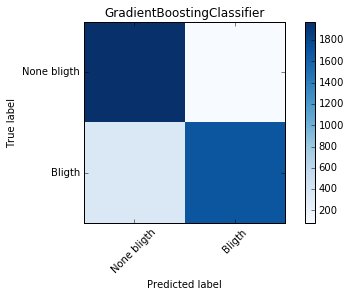

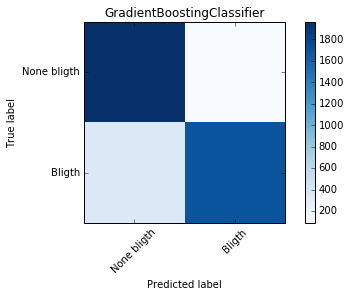

In [34]:
BenchMarkRandom(Completao(), UltimateComplete())

In [35]:
getparametersBoost(Completao())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[(0.0, 'AGGRAVATEDASSAULTG8'),
 (0.0, 'AmbientCall8'),
 (0.0, 'DAMAGETOPROPERTYG8'),
 (0.0, 'LARCENYG8'),
 (0.0, 'ROBBERYG8'),
 (0.0, 'STOLENVEHICLEG8'),
 (0.0, 'TRAFFICVIOLATIONS1G8'),
 (0.0, 'TRAFFICVIOLATIONS2G8'),
 (0.00018362500358823895, 'PaidViolation'),
 (0.00047952747322193537, 'UnemployedPercentage'),
 (0.00067578973289930189, 'BURGLARYG8'),
 (0.0012407104128450081, 'DANGEROUSDRUGSG8'),
 (0.0014488729962222307, 'ASSAULTG8'),
 (0.0015095428456778012, 'PercentageBelowPoverty'),
 (0.0033226362098145229, 'call7'),
 (0.0048956756378890822, 'PercentageWhitePopulation'),
 (0.0059924584557612915, 'PercentageFamilyHouseholds'),
 (0.0065576866894717367, 'call6'),
 (0.0070167759465720823, 'v7'),
 (0.0078931717571875653, 'MedianHouseValue'),
 (0.010162260546193867, 'PercentagePopulation'),
 (0.010942243496536653, 'v6'),
 (0.011029837302649925, 'AmbientCrime8'),
 (0.011148341682925977, 'IncomePerHousehold'),
 (0.013480250933289632, 'PersonsPerHousehold'),
 (0.013791230867531125, 'Percenta

In [36]:
parameters = getparametersBoost(Completao())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [37]:
parameters

[(0.0, 'AGGRAVATEDASSAULTG8'),
 (0.0, 'AmbientCall8'),
 (0.0, 'DAMAGETOPROPERTYG8'),
 (0.0, 'LARCENYG8'),
 (0.0, 'PercentageBelowPoverty'),
 (0.0, 'ROBBERYG8'),
 (0.0, 'STOLENVEHICLEG8'),
 (0.0, 'TRAFFICVIOLATIONS1G8'),
 (0.0, 'TRAFFICVIOLATIONS2G8'),
 (0.00018362500358820276, 'PaidViolation'),
 (0.00041446842556295383, 'UnemployedPercentage'),
 (0.00067578973289920605, 'BURGLARYG8'),
 (0.0012407104128447646, 'DANGEROUSDRUGSG8'),
 (0.0014488729962208256, 'ASSAULTG8'),
 (0.0033226362098119256, 'call7'),
 (0.0041672755959427966, 'PercentageFamilyHouseholds'),
 (0.0046427305743256108, 'PercentageWhitePopulation'),
 (0.0065576866894710853, 'call6'),
 (0.007108801042652906, 'v7'),
 (0.0078931717571867829, 'MedianHouseValue'),
 (0.008821208341732379, 'PercentagePopulation'),
 (0.011029837302651386, 'AmbientCrime8'),
 (0.011524609101396284, 'v6'),
 (0.012583532264023032, 'PercentageBelow50Poverty'),
 (0.014328410327420851, 'IncomePerHousehold'),
 (0.015370977873237442, 'MedianAge'),
 (0.01642

In [7]:
from pylab import *

def plotparameters(parameters, names=None):
    # make a square figure and axes
    figure(1, figsize=(10,10))
    ax = axes([0.1, 0.1, 0.8, 0.8])
    old = rcParams['font.size']
    rcParams['font.size'] = 16.0
 
    # The slices will be ordered and plotted counter-clockwise.
    labels = [p[1] if p[0]>0.01 else '' for p in parameters]
    if names is not None:
        labels = [names.get(original,original) for original in labels]
    fracs = [p[0] for p in parameters]
    #explode=(0, 0.05, 0, 0)

    pie(fracs, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
    # The default startangle is 0, which would start
    # the Frogs slice on the x-axis.  With startangle=90,
    # everything is rotated counter-clockwise by 90 degrees,
    # so the plotting starts on the positive y-axis.

    show()
    rcParams['font.size']=old

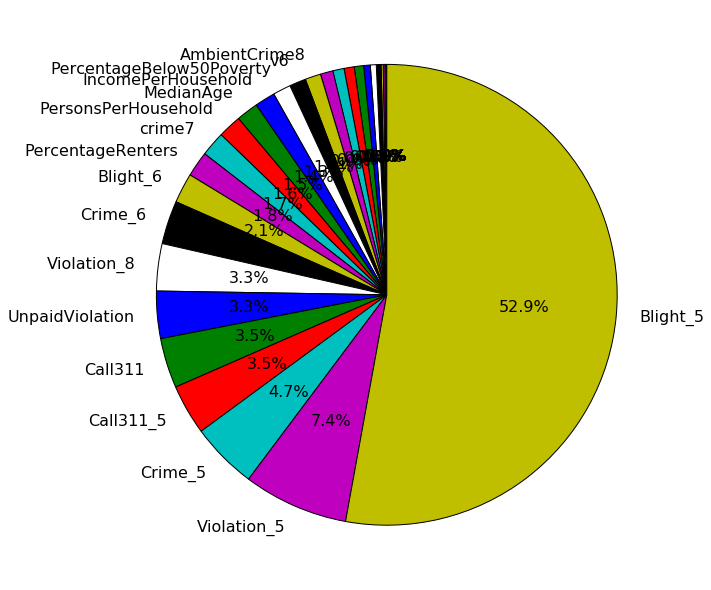

In [75]:
names ={'pastbligth5': 'Blight_5', 
'viol5': 'Violation_5', 
'Call311Number': 'Call311', 
'call5': 'Call311_5', 
'Unpaid': 'UnpaidViolation', 
'AmbientViolation8': 'Violation_8', 
'crime6': 'Crime_6', 
'pastbligth6': 'Blight_6', 
'crime5':'Crime_5'}
plotparameters(parameters, names)

In [12]:
class NewVersion(DataExtractorScaler):
    def getparameters(self):
        return ['pastbligth6', 'pastbligth5', 'Call311Number', 'AmbientCrime8', 'crime7', 'crime6', 'TRAFFICVIOLATIONS1G8','ASSAULTG8',
                'LARCENYG8','DAMAGETOPROPERTYG8','AGGRAVATEDASSAULTG8','BURGLARYG8', 'STOLENVEHICLEG8', 'crime5', 'viol5', 'past2bligth5', 'past3bligth5',
                'TRAFFICVIOLATIONS2G8','ROBBERYG8','DANGEROUSDRUGSG8', 'AmbientCall8', 'call7', 'call6', 'call5', 'PaidViolation',
                'PersonsPerHousehold', 'MedianHouseValue', 'IncomePerHousehold', 'PercentageFamilyHouseholds', 'PercentageBelowPoverty',  
                'PercentageBelow50Poverty', 'PercentageRenters', 'UnemployedPercentage',  'PercentageWhitePopulation',  'MedianAge',
                'AmbientViolation8', 'v7', 'v6', 'Unpaid', 'PercentagePopulation']
    
    def getquery(self):
        return ("select BlightViolationNumber - coalesce(UnpayedViolationByHouse.Count,0) as PaidViolation, Call311Number, AmbientCrime8, AmbientCrime7 - AmbientCrime8 as crime7, "
                "coalesce(crimeNumber,0) as crime5, "
                "coalesce(violationNumber,0) as viol5, "
                "coalesce(callNumber,0) as call5, "
                "(select  count(*) from bligthdata where  bligthdata.Geo6 = NewdataZip2.Geo6 and "
                "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth6, "
                  "(select  count(*) from bligthdata where  bligthdata.Geo5 = NewdataZip2.Geo5 and "
                 "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 10 and 365) as pastbligth5, "
                "(select  count(*) from bligthdata where  bligthdata.Geo5 = NewdataZip2.Geo5 and "
                 "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 366 and 730) as past2bligth5, "
                "(select  count(*) from bligthdata where  bligthdata.Geo5 = NewdataZip2.Geo5 and "
                 "julianday(NewdataZip2.DateReference) - julianday(bligthdata.DateReference)  between 731 and 1096) as past3bligth5, "
            "AmbientCrime6 - AmbientCrime7 as crime6, AmbientCall8, AmbientCall6 - AmbientCall7 as call6, AmbientCall7- AmbientCall8 as call7, "
            "AmbientViolation8, AmbientViolation7 - AmbientViolation8 as v7, AmbientViolation6 - AmbientViolation7 as v6, Demolished, "
             "TRAFFICVIOLATIONS1G8,ASSAULTG8,LARCENYG8,DAMAGETOPROPERTYG8,AGGRAVATEDASSAULTG8,BURGLARYG8,STOLENVEHICLEG8,TRAFFICVIOLATIONS2G8,"
             "ROBBERYG8,DANGEROUSDRUGSG8, PersonsPerHousehold, MedianHouseValue, IncomePerHousehold, (Population2010 - Population2000) * 100 / Population2010 as PercentagePopulation, "
             "PercentageFamilyHouseholds, PercentageBelowPoverty,  PercentageBelow50Poverty, PercentageRenters, UnemployedPercentage,MedianAge,  "
             "(100 * WhitePopulation)/(BlackPopulation+WhitePopulation) as PercentageWhitePopulation, "
            "coalesce(UnpayedViolationByHouse.Count,0) as Unpaid  from NewdataZip2  "
            "left outer join crimegeo5 on  NewdataZip2.Geo5=crimegeo5.GeoHash "
            "left outer join callgeo5 on  NewdataZip2.Geo5=callgeo5.GeoHash "
            "left outer join violationgeo5 on  NewdataZip2.Geo5=violationgeo5.GeoHash "
            "left outer join UnpayedViolationByHouse on  NewdataZip2.StreetNumber=UnpayedViolationByHouse.StreetNumber "
            " and  NewdataZip2.StreetName =UnpayedViolationByHouse.StreetName order by random()")

First Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.9634680954700439
precision 0.992240041386446
recall 0.934242571846079
f1 0.9623682890115405
Roc 0.9634680954700439
[[2038   15]
 [ 135 1918]]

Second Option GradientBoostingClassifier


C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


accuracy 0.897467121285923
precision 0.9538375973303671
recall 0.8353628835849976
f1 0.8906777460399897
Roc 0.897467121285923
[[1970   83]
 [ 338 1715]]



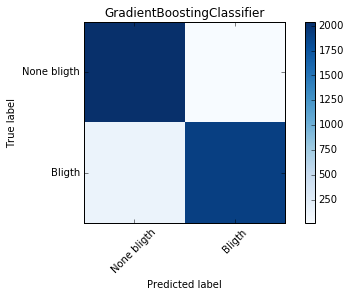

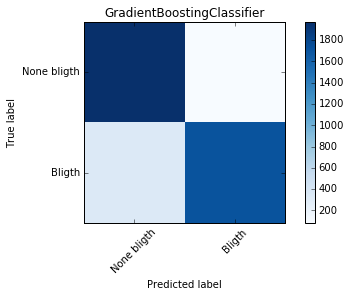

In [14]:
rcParams['font.size'] = 10
BenchMarkRandom(NewVersion(), Completao())

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


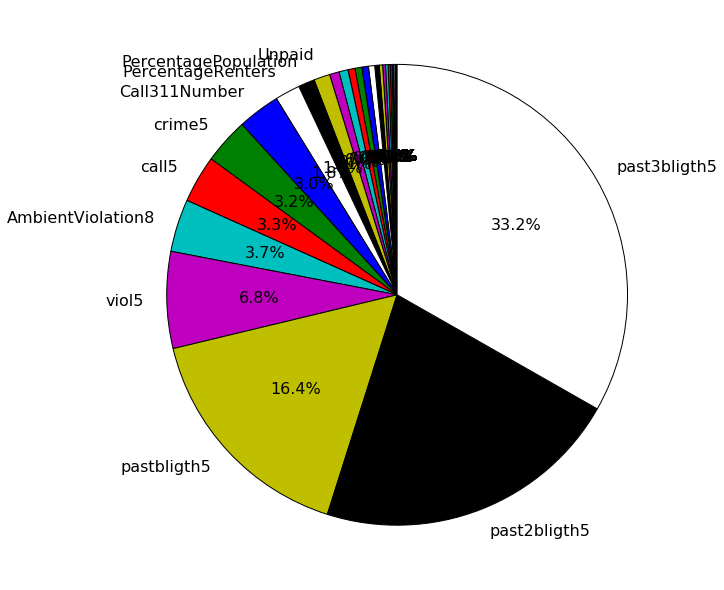

In [15]:
parameters = getparametersBoost(NewVersion())
plotparameters(parameters)